In [1]:
%pylab inline
import pandas as pd
import numpy as np
import os
import scipy.stats

import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42


Populating the interactive namespace from numpy and matplotlib


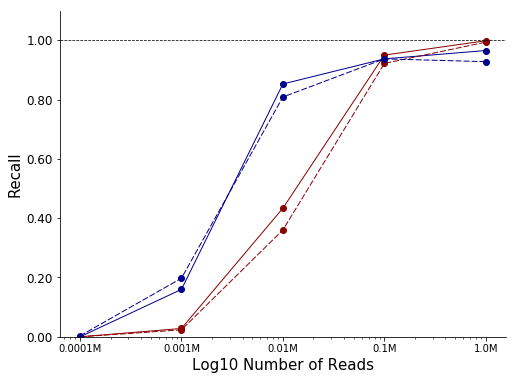

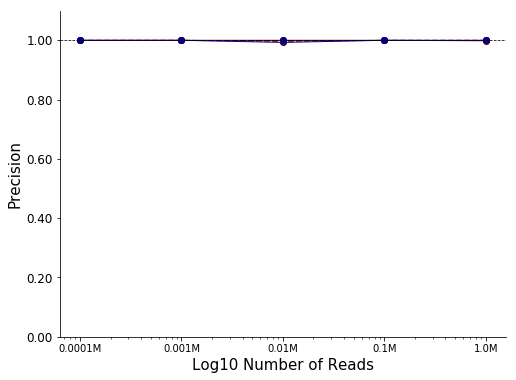

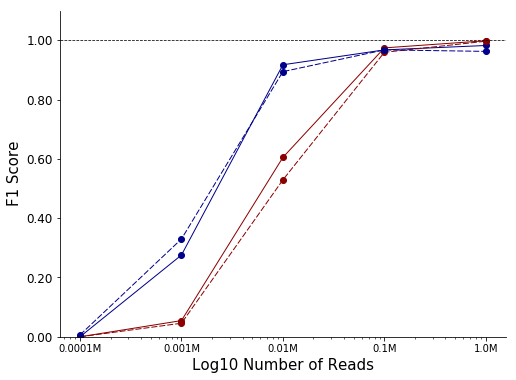

In [10]:
fdash = {
    "HM-paired": [7,0],
    "TF-paired": [7,0],
    "HM-single": [6,2],
    "TF-single": [6,2],
}

PDFDIR = "pdfs/"

def readnum_plot(yvar, NA=0):
    fig = plt.figure()
    fig.set_size_inches((8, 6))
    ax = fig.add_subplot(111)
    for factor in fdash.keys():
        data = pd.read_csv("%s.summary_stats_readnum.tab"%factor, sep="\t")
        data.fillna(NA, inplace=True)
        data["narrow-F1"] = 2*(data['narrow-recall']*data["narrow-precision"])/(data["narrow-recall"] + data["narrow-precision"])
        data["broad-F1"] = 2*(data['broad-recall']*data["broad-precision"])/(data["broad-recall"] + data["broad-precision"])
        if factor.split('-')[0] == 'TF':
            ax.plot((data["numreads"]), data["narrow-%s"%yvar], linewidth=1, 
                     marker="o", color="darkblue", label=factor, dashes=fdash[factor])
        else:
            ax.plot((data["numreads"]), data["broad-%s"%yvar], linewidth=1, 
                     marker="o", color="darkred", label=factor, dashes=fdash[factor])

    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')
    ax.set_ylim(bottom=0, top=1.1)
    ax.axhline(y=1.00, linestyle="dashed", color="black", linewidth=0.75)

    readnums = [100, 1000, 10000, 100000, 1000000]
    ax.set_xscale('log');
    ax.set_xticks(readnums)
    ax.set_xticklabels(["%sM"%(item/1000000) for item in readnums])
    ax.set_yticklabels(["%0.2f"%item for item in ax.get_yticks()], size=12)
    ax.set_xlabel("Log10 Number of Reads", size=15)
    ax.set_yticklabels(["%0.2f"%item for item in ax.get_yticks()], size=12)

    if yvar == "recall":
        ax.set_ylabel("Recall", size=15);
    elif yvar == "precision":
        ax.set_ylabel("Precision", size=15);
    else:
        ax.set_ylabel("F1 Score", size=15);
    #ax.legend(bbox_to_anchor=(1.04, 1), loc="upper left");
    fig.savefig(os.path.join(PDFDIR, "Fig2b_%s_ParamsAnalysis.pdf"%yvar))
    
readnum_plot("recall")
readnum_plot("precision", NA=1.0)
readnum_plot("F1", NA=1.0)